## Lingüística Computacional: Glottolog + Sails :)

## Tarea computacional!
### Distancias de Hamming para lenguas de Sudamérica

1. **Elegir 5 rasgos de Sails.** Descargue los datos en formato txt. La selección debe ser coherente con el fin de facilitar la interpretación de los resultados.
2. Lea los 5 archivos mediante **Pandas**. Con esta información, **construya un diccionario de rasgos.** Si el mismo procedimiento desarrollado en este notebook.
3. Elija **una lengua** para comparar.
4. Calcule **distancias de Hamming** entre **la lengua elegida y todas las demás.** Ordene las distancias de forma creciente. 
5. **Concluya** acerca de sus resultados. 
6. Entregue un **notebook** con sus cálculos. Trate de explicar muy bien tanto los pasos de análisis como las conclusiones finales. 

### 1. Leemos los archivos

In [1]:
import pandas as pd

In [2]:
import glob as glob

archivos_txt = glob.glob('*.txt')
archivos = {fp.replace('.txt',''):pd.read_csv(fp, sep='\t') for fp in archivos_txt}

In [3]:
for rasgo in archivos.keys():
    print(archivos[rasgo])

    iso-639-3                  name value description   latitude  longitude  \
0         agr              Aguaruna     0          no  -5.300440 -77.921790   
1         apu               Apurinã     0          no  -8.216920 -66.771410   
2         arl               Arabela     1         yes  -1.961260 -75.061170   
3         arh               Arhuaco     0          no  10.701840 -73.636290   
4         kwi          Awa-Cuaiquer     0          no   1.216525 -78.340135   
..        ...                   ...   ...         ...        ...        ...   
96        mtp  Wichí Lhamtés Nocten     1         yes -21.987995 -63.597110   
97        yaa             Yaminahua     0          no  -9.884597 -71.596433   
98        ame              Yanesha'     1         yes -10.545390 -75.314970   
99        yuq                 Yuqui     0          no -16.787520 -64.943820   
100       yuz              Yuracaré     0          no -16.747880 -65.122410   

           family  
0         Chicham  
1        Ar

### 2. Creamos diccionarios de rasgos

In [4]:
## Primero, definimos un diccionario vacío
diccionarios = {}

## Segundo, recorremos la lista en archivos.keys
for rasgo in archivos.keys():
     ## Accedemos a cada rasgo seleccionando solo a dos entradas del diccionario: name y value
    diccionario_rasgo = archivos[rasgo]
    nombre_valor = dict(zip(diccionario_rasgo['name'],diccionario_rasgo['value']))
    ## Guardamos
    diccionarios[rasgo] = nombre_valor

In [5]:
## Visualizamos los items (pares key-value) del archivo NP830-c
diccionarios['NP830-c']

{'Aguaruna': '0',
 'Apurinã': '0',
 'Arabela': '1',
 'Arhuaco': '0',
 'Awa-Cuaiquer': '0',
 'Ayacucho Quechua': '0',
 'Ayoreo': '1',
 'Baure': '1',
 'Bora': '1',
 'Bororo': '1',
 'Cajamarca Quechua': '0',
 'Callawalla': '0',
 'Canela': '1',
 'Cavineña': '0',
 'Central Aymara': '0',
 'Chamacoco': '0',
 'Chipaya': '0',
 'Cholón': '1',
 'Cocama-Cocamilla': '0',
 'Cofán': '0',
 'Cubeo': '1',
 'Cusco Quechua': '0',
 'Desano': '1',
 'Dâw': '?',
 'Emerillon': '0',
 'Ese Ejja': '0',
 'Gavião Do Jiparaná': '0',
 'Hixkaryána': '0',
 'Huallaga Huánuco Quechua': '0',
 'Huangascar-Topara-Yauyos Quechua': '0',
 'Huaylas Ancash Quechua': '0',
 'Hupdë': '1',
 'Imbabura Highland Quichua': '0',
 'Inga': '0',
 'Iquito': '0',
 'Itonama': '1',
 'Jamamadí': '0',
 'Jaqaru': '0',
 'Jauja Wanca Quechua': '0',
 'Kadiwéu': '1',
 'Kamayurá': '?',
 'Kanoê': '1',
 'Karitiâna': '0',
 'Karo (Brazil)': '1',
 'Kwaza': '1',
 'Lakondê': '1',
 'Lao': '1',
 'Leco': '0',
 'Maca': '0',
 'Mamaindé': '1',
 'Mapudungun': '0',
 

In [6]:
## Juntamos todas las lenguas

## Primero, definimos otro diccionario vacío
rasgos = {}

## Segundo, recorremos los rasgos en la lista diccionarios.keys
for rasgo in diccionarios.keys():
    lenguas = list(diccionarios[rasgo].keys())
    ## Tercero, recorremos otro ciclo for en la lista lenguas
    for lengua in lenguas:
        rasgos[lengua] = {}

In [7]:
## Visualizamos el largo del diccionario llamado rasgos
len(rasgos)

101

In [8]:
## Recorremos la lista diccionarios.keys 
for rasgo in diccionarios.keys():
    
    ## Recorremos la lista rasgos.keys
    for lengua in rasgos.keys():
        ## solo agregamos si está en diccionarios.keys
        if lengua in diccionarios[rasgo].keys():
            rasgos[lengua][rasgo]=diccionarios[rasgo][lengua]

In [9]:
## Visualizamos
rasgos

{'Aguaruna': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP835-cpc': nan,
  'NP838-cdf': nan},
 'Apurinã': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP835-cpc': nan,
  'NP838-cdf': nan},
 'Arabela': {'NP830-c': '1',
  'NP831-cn': '?',
  'NP832-cno': '?',
  'NP835-cpc': '?',
  'NP838-cdf': '0'},
 'Arhuaco': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP835-cpc': nan,
  'NP838-cdf': nan},
 'Awa-Cuaiquer': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP835-cpc': nan,
  'NP838-cdf': nan},
 'Ayacucho Quechua': {'NP830-c': '0',
  'NP831-cn': nan,
  'NP832-cno': nan,
  'NP835-cpc': nan,
  'NP838-cdf': nan},
 'Ayoreo': {'NP830-c': '1',
  'NP831-cn': 'A',
  'NP832-cno': 'A',
  'NP835-cpc': 'D',
  'NP838-cdf': '0'},
 'Baure': {'NP830-c': '1',
  'NP831-cn': 'C',
  'NP832-cno': 'C',
  'NP835-cpc': 'A',
  'NP838-cdf': '1'},
 'Bora': {'NP830-c': '1',
  'NP831-cn': 'C',
  'NP832-cno': 'C',
  'NP835-cpc': 'C',
  'NP838-cdf': '1'},
 'Bororo':

In [10]:
## Visualizamos los items (pares key-value) del Tariana
rasgos['Tariana']

{'NP830-c': '1',
 'NP831-cn': 'C',
 'NP832-cno': 'C',
 'NP835-cpc': 'C',
 'NP838-cdf': '1'}

In [11]:
## Visualizamos los items (pares key-value) del Chipaya
rasgos['Chipaya']

{'NP830-c': '0',
 'NP831-cn': '?',
 'NP832-cno': '?',
 'NP835-cpc': '?',
 'NP838-cdf': '?'}

### 3. Distancias

In [12]:
## distancia de Hamming!

def hamming(nombre1,nombre2):
    ## número de rasgos en que las lenguas difieren
    d = 0
    ## número total de rasgos en común
    n = 0
    ## accedemos a los diccionarios de rasgos
    lengua1 = rasgos[nombre1]
    lengua2 = rasgos[nombre2]
    ## contamos con un ciclo for
    for rasgo in lengua1.keys():
        ## nos preguntamos si rasgo pertenece a ambas lenguas
        if rasgo in lengua2.keys():
            ## revisamos si poseen valores distintos
            if lengua1[rasgo] != lengua2[rasgo]:
                ## en este caso sumamos 1 a d
                d += 1.0
            ## número total de rasgos
            n += 1.0
    ## entregamos la división entre el número rasgos en que las lenguas difieren y el número total de rasgos comunes
    return d/n

In [13]:
hamming('Tariana','Chipaya')

1.0

In [14]:
lengua_comp = 'Tariana'

In [15]:
distancias = {}

In [16]:
for lengua in rasgos.keys():
    distancias[lengua]=hamming(lengua_comp,lengua)

In [17]:
distancias_ordenadas = dict(sorted(distancias.items(), key=lambda item: item[1]))

In [18]:
distancias_ordenadas

{'Bora': 0.0,
 'Cubeo': 0.0,
 'Desano': 0.0,
 'Kwaza': 0.0,
 'Lakondê': 0.0,
 'Tariana': 0.0,
 'Baure': 0.2,
 'Movima': 0.2,
 'Siona-Tetete': 0.2,
 "Yanesha'": 0.2,
 'Tsafiki': 0.4,
 'Bororo': 0.6,
 'Hupdë': 0.6,
 'Itonama': 0.6,
 'Kanoê': 0.6,
 'Mamaindé': 0.6,
 'Ninam': 0.6,
 'Puinave': 0.6,
 'Sabanê': 0.6,
 'Arabela': 0.8,
 'Ayoreo': 0.8,
 'Canela': 0.8,
 'Cholón': 0.8,
 'Kadiwéu': 0.8,
 'Karo (Brazil)': 0.8,
 'Lao': 0.8,
 'Mochica': 0.8,
 'Mocoví': 0.8,
 'Muniche': 0.8,
 'Panare': 0.8,
 'Pilagá': 0.8,
 'Toba': 0.8,
 'Wichí Lhamtés Nocten': 0.8,
 'Aguaruna': 1.0,
 'Apurinã': 1.0,
 'Arhuaco': 1.0,
 'Awa-Cuaiquer': 1.0,
 'Ayacucho Quechua': 1.0,
 'Cajamarca Quechua': 1.0,
 'Callawalla': 1.0,
 'Cavineña': 1.0,
 'Central Aymara': 1.0,
 'Chamacoco': 1.0,
 'Chipaya': 1.0,
 'Cocama-Cocamilla': 1.0,
 'Cofán': 1.0,
 'Cusco Quechua': 1.0,
 'Dâw': 1.0,
 'Emerillon': 1.0,
 'Ese Ejja': 1.0,
 'Gavião Do Jiparaná': 1.0,
 'Hixkaryána': 1.0,
 'Huallaga Huánuco Quechua': 1.0,
 'Huangascar-Topara-Yauy

### 4. Visualización 1

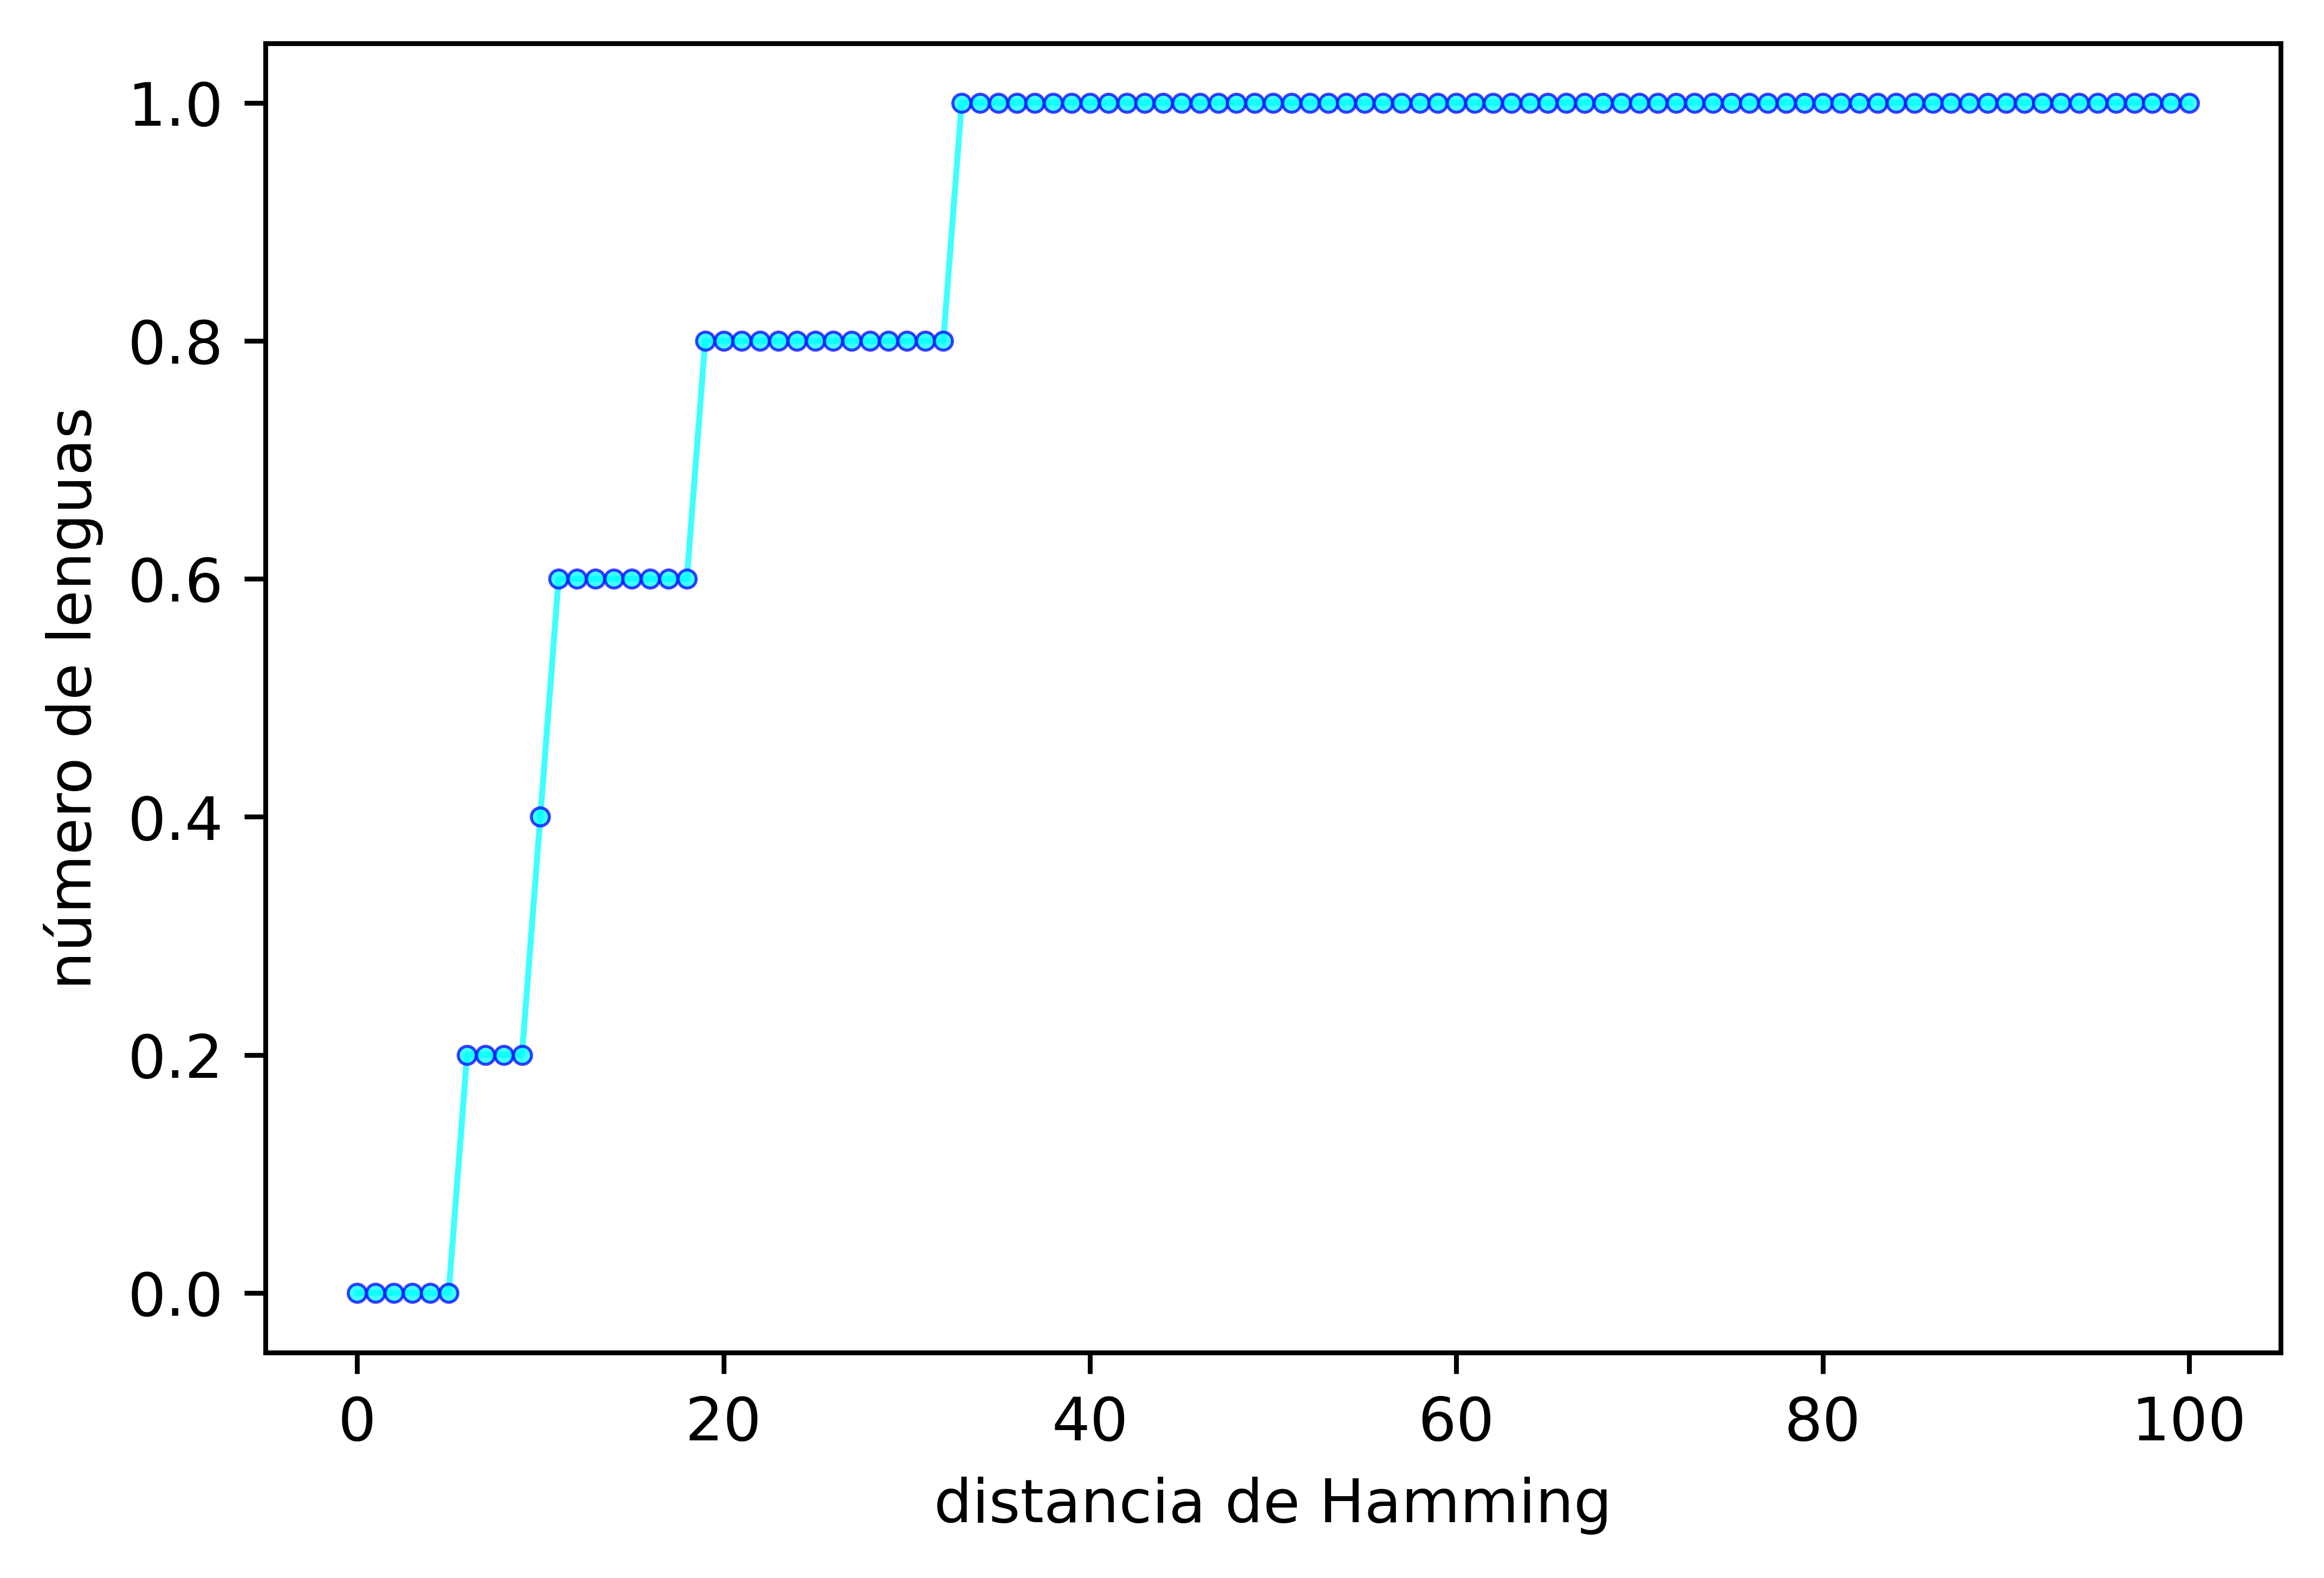

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.plot(range(len(distancias_ordenadas)),distancias_ordenadas.values(),marker='o',color='aqua',markersize=3,markeredgewidth=0.5,markeredgecolor='b',alpha=0.75,linewidth=1,fillstyle='full')

plt.xlabel(r'distancia de Hamming',fontsize=10)
plt.ylabel(r'número de lenguas',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 5. Visualización 2

In [20]:
lenguajes = pd.read_csv('languages.csv', sep=',')

In [21]:
lenguajes

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name,Status,Parent_Glottocode
0,guri1248,Guriaso,Papunesia,-3.571800,141.597000,guri1248,grx,NaN,NaN,shifting,NaN
1,pawa1255,Pawaia,Papunesia,-6.880210,145.081000,pawa1255,pwa,NaN,NaN,shifting,NaN
2,guam1236,Guamo,South America,8.235103,-67.401875,guam1236,NaN,NaN,NaN,extinct,NaN
3,dama1272,Damal,Papunesia,-4.173450,137.496000,dama1272,uhn,NaN,NaN,shifting,NaN
4,puqu1242,Puquina,South America,-15.899200,-69.961100,puqu1242,puq,NaN,NaN,extinct,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8113,guan1268,Guana (Paraguay),South America,-21.980300,-58.065400,guan1268,gva,leng1261,Lengua-Mascoy,shifting,east2852
8114,sana1298,Sanapaná,South America,-22.490000,-58.380000,sana1298,spn,leng1261,Lengua-Mascoy,shifting,east2852
8115,anga1316,Angaité,South America,-22.850000,-58.450000,anga1316,aqt,leng1261,Lengua-Mascoy,moribund,east2852
8116,gily1242,Amur Nivkh,Eurasia,52.590000,140.681000,gily1242,niv,nivk1234,Nivkh,moribund,nivk1234


In [22]:
## veamos las columnas

lenguajes.columns

Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family_Glottocode', 'Family_Name', 'Status',
       'Parent_Glottocode'],
      dtype='object')

In [23]:
## ¿Y si filtramos por lenguas de Sudamérica?

SA = lenguajes[lenguajes['Macroarea']=='South America']

In [24]:
## nombres de lenguas
nombres = list(SA['Name'])

In [25]:
## hagamos un gráfico de posiciones geográficas :)

latitud = list(SA['Latitude'])
longitud = list(SA['Longitude'])

In [26]:
latitud_longitud = list(zip(latitud,longitud))

In [27]:
latitud_longitud

[(8.2351027, -67.4018753),
 (-15.8992, -69.9611),
 (-27.4063, -58.9661),
 (4.0673594, -62.8676118),
 (-13.8115, -65.6348),
 (-5.7441796, -76.426712),
 (3.436864, -76.522636),
 (-13.2482, -65.4822),
 (-55.2748, -68.2648),
 (-23.0, -69.0),
 (-25.221839000000003, -61.887818),
 (-12.80431, -64.35748000000001),
 (3.969231, -64.235892),
 (-8.953642, -38.2742287),
 (7.50851, -59.3528),
 (-13.636709, -62.2020909),
 (0.276675, -77.0643),
 (-12.7178, -57.9806),
 (-8.999989999999999, -37.0167),
 (3.92974, -67.6886),
 (7.223905999999999, -71.420238),
 (0.834931, -79.778137),
 (1.14537, -76.8931),
 (-0.53751, -72.0869),
 (-6.7771300000000005, -61.8167),
 (-8.01667, -79.0),
 (-15.0092, -67.8818),
 (-24.315323100000004, -50.5580261),
 (-5.568969, -80.82824699999999),
 (-16.769554, -61.817795),
 (-8.6606156, -37.0869089),
 (7.10677, -67.5996),
 (-3.22497, -75.5603),
 (-4.44006, -75.4211),
 (2.716, -73.768),
 (-12.6695, -60.5353),
 (-4.23835, -76.9347),
 (-12.1789, -64.5812),
 (8.848165, -70.975342),
 

In [28]:
dict_lat_lon = dict(zip(nombres,latitud_longitud))

In [29]:
dict_lat_lon = {lengua:dict_lat_lon[lengua] for lengua in distancias if lengua in dict_lat_lon.keys()}

In [30]:
len(dict_lat_lon)

90

In [31]:
dict_lat_lon

{'Aguaruna': (-5.30044, -77.9218),
 'Apurinã': (-8.21692, -66.7714),
 'Arabela': (-1.96126, -75.0612),
 'Arhuaco': (10.7018, -73.6363),
 'Awa-Cuaiquer': (1.21652, -78.3401),
 'Ayacucho Quechua': (-13.84714, -74.32245999999999),
 'Ayoreo': (-19.220055, -60.21749499999999),
 'Baure': (-13.1278, -64.1838),
 'Bora': (-2.000259, -72.25706600000001),
 'Bororo': (-16.6029, -55.2004),
 'Cajamarca Quechua': (-7.093139999999999, -78.3214),
 'Callawalla': (-15.88451, -68.10176),
 'Cavineña': (-13.3544, -66.6277),
 'Central Aymara': (-17.0, -68.5),
 'Chamacoco': (-20.5899, -58.2005),
 'Chipaya': (-18.73951, -67.89633),
 'Cholón': (-9.23129, -75.9621),
 'Cocama-Cocamilla': (-4.5, -74.0),
 'Cofán': (0.276675, -77.0643),
 'Cubeo': (1.32382, -70.1939),
 'Cusco Quechua': (-14.0853, -71.7663),
 'Desano': (0.58157, -69.4955),
 'Dâw': (-0.1177, -67.2934),
 'Ese Ejja': (-11.7268, -67.515),
 'Gavião Do Jiparaná': (-10.7235, -61.6752),
 'Hixkaryána': (-0.16265, -58.80153000000001),
 'Huallaga Huánuco Quechua

In [32]:
Y = list(zip(*dict_lat_lon.values()))[0]
X = list(zip(*dict_lat_lon.values()))[1]

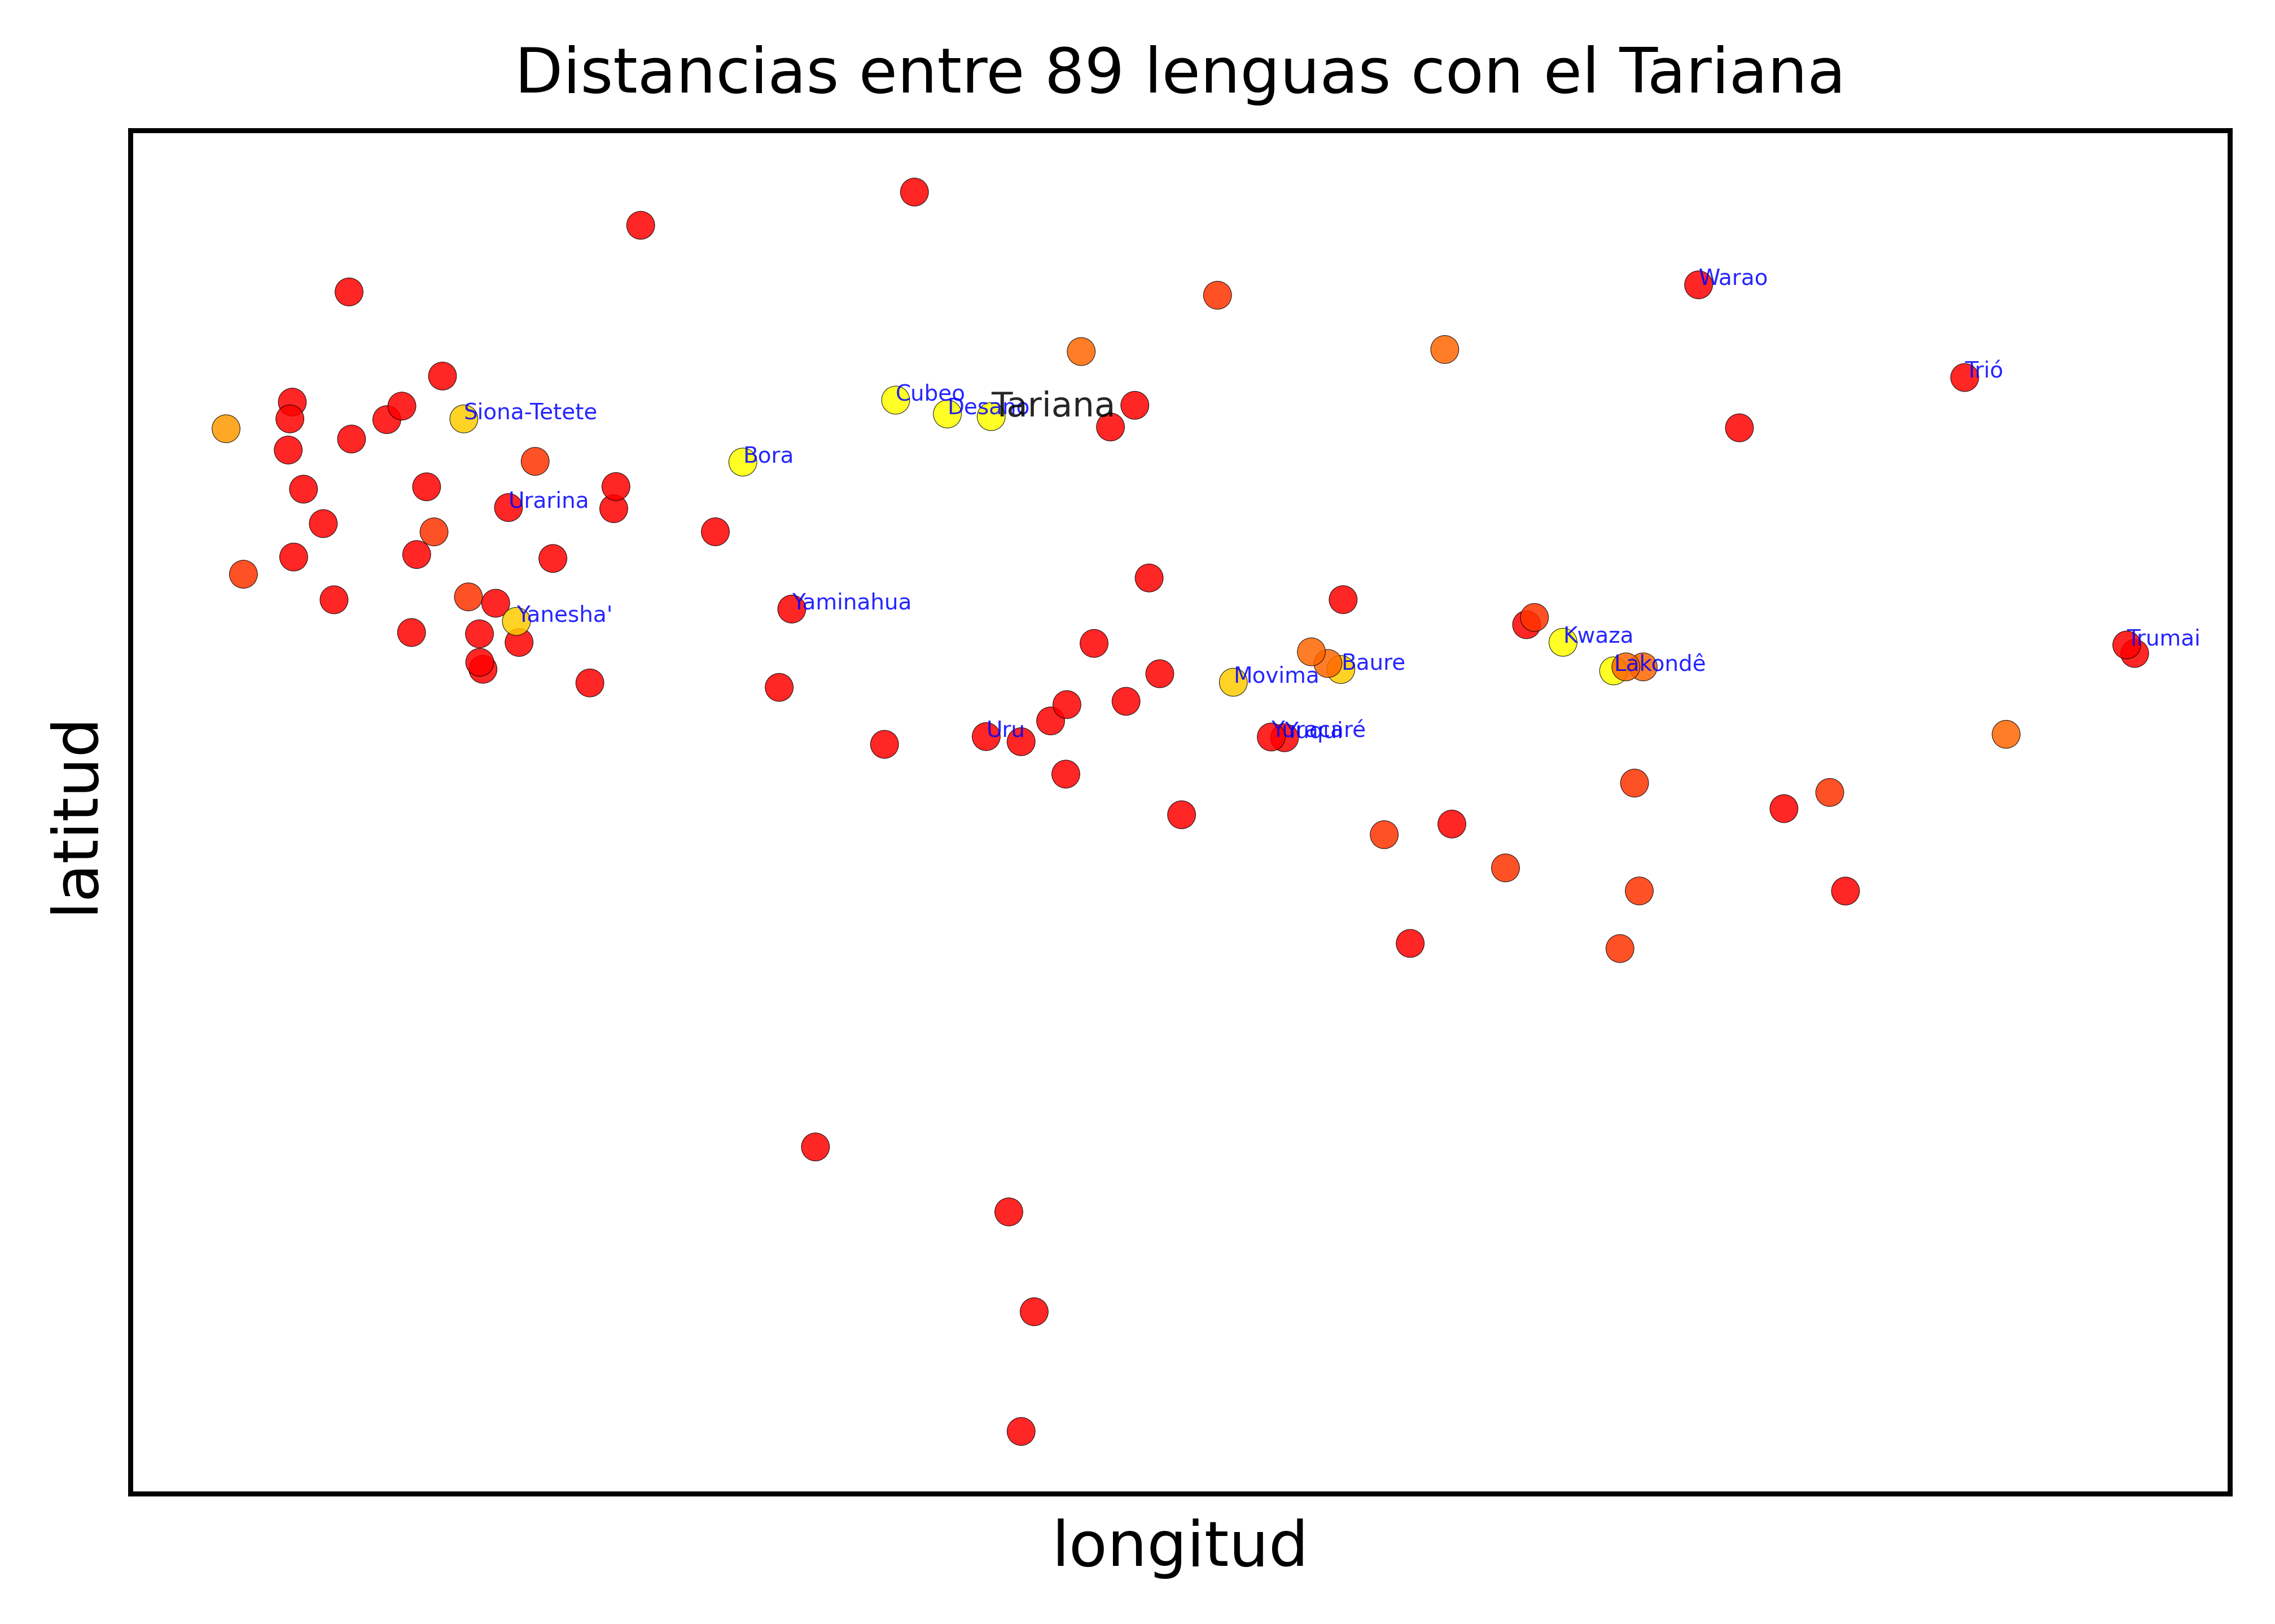

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for lengua in list(distancias_ordenadas.keys())[:10]+list(distancias_ordenadas.keys())[-10:]:
    if lengua in dict_lat_lon.keys():
        if lengua == lengua_comp:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=5.5, alpha=0.85)
        else:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='b', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=3.5, alpha=0.85)

ax.scatter(X,Y,c=[distancias[lengua] for lengua in dict_lat_lon.keys()], s=20, edgecolors='k',linewidths=0.1, cmap=plt.cm.get_cmap('autumn').reversed(),alpha=0.85)

plt.grid(False)
plt.title('Distancias entre {}'.format(len(dict_lat_lon)-1)+' lenguas con el {}'.format(lengua_comp),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'latitud',fontsize=10)
plt.xlabel(r'longitud',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('mapa_distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 6. Visualización 3

In [34]:
!pip install haversine

In [35]:
from haversine import haversine

In [36]:
distancias_geo_lengua_comp = {}

for lengua in dict_lat_lon.keys():
    distancias_geo_lengua_comp[lengua]=haversine(dict_lat_lon[lengua],dict_lat_lon[lengua_comp])

In [37]:
distancias_geo_lengua_comp

{'Aguaruna': 1187.536945351553,
 'Apurinã': 991.2278430000017,
 'Arabela': 734.7584209121904,
 'Arhuaco': 1255.1797854674414,
 'Awa-Cuaiquer': 1052.6531090892063,
 'Ayacucho Quechua': 1697.0604782244698,
 'Ayoreo': 2382.7685017500316,
 'Baure': 1595.9261850825444,
 'Bora': 461.0748018093374,
 'Bororo': 2418.561502857171,
 'Cajamarca Quechua': 1338.9982220060747,
 'Callawalla': 1817.3647272333335,
 'Cavineña': 1554.2762706993199,
 'Central Aymara': 1939.7707615044458,
 'Chamacoco': 2612.370984648201,
 'Chipaya': 2135.5292185112507,
 'Cholón': 1329.4162878767788,
 'Cocama-Cocamilla': 788.8118956049416,
 'Cofán': 907.5270684586079,
 'Cubeo': 173.82300117733777,
 'Cusco Quechua': 1645.6162465542034,
 'Desano': 67.60000422507322,
 'Dâw': 189.55071407608818,
 'Ese Ejja': 1361.5828549007458,
 'Gavião Do Jiparaná': 1476.4191991833409,
 'Hixkaryána': 1125.3570202439741,
 'Huallaga Huánuco Quechua': 1337.050310273989,
 'Huangascar-Topara-Yauyos Quechua': 1686.3961276615526,
 'Huaylas Ancash Quec

In [38]:
dict_geo_tip = {}

for lengua in distancias_geo_lengua_comp.keys():
    dict_geo_tip[lengua]=[distancias_geo_lengua_comp[lengua],distancias[lengua]]

In [39]:
dict_geo_tip

{'Aguaruna': [1187.536945351553, 1.0],
 'Apurinã': [991.2278430000017, 1.0],
 'Arabela': [734.7584209121904, 0.8],
 'Arhuaco': [1255.1797854674414, 1.0],
 'Awa-Cuaiquer': [1052.6531090892063, 1.0],
 'Ayacucho Quechua': [1697.0604782244698, 1.0],
 'Ayoreo': [2382.7685017500316, 0.8],
 'Baure': [1595.9261850825444, 0.2],
 'Bora': [461.0748018093374, 0.0],
 'Bororo': [2418.561502857171, 0.6],
 'Cajamarca Quechua': [1338.9982220060747, 1.0],
 'Callawalla': [1817.3647272333335, 1.0],
 'Cavineña': [1554.2762706993199, 1.0],
 'Central Aymara': [1939.7707615044458, 1.0],
 'Chamacoco': [2612.370984648201, 1.0],
 'Chipaya': [2135.5292185112507, 1.0],
 'Cholón': [1329.4162878767788, 0.8],
 'Cocama-Cocamilla': [788.8118956049416, 1.0],
 'Cofán': [907.5270684586079, 1.0],
 'Cubeo': [173.82300117733777, 0.0],
 'Cusco Quechua': [1645.6162465542034, 1.0],
 'Desano': [67.60000422507322, 0.0],
 'Dâw': [189.55071407608818, 1.0],
 'Ese Ejja': [1361.5828549007458, 1.0],
 'Gavião Do Jiparaná': [1476.4191991

In [40]:
import random

X = [dict_geo_tip[localidad][0] for localidad in dict_geo_tip.keys()]
Y = [dict_geo_tip[localidad][1]+random.random()/50 for localidad in dict_geo_tip.keys()]

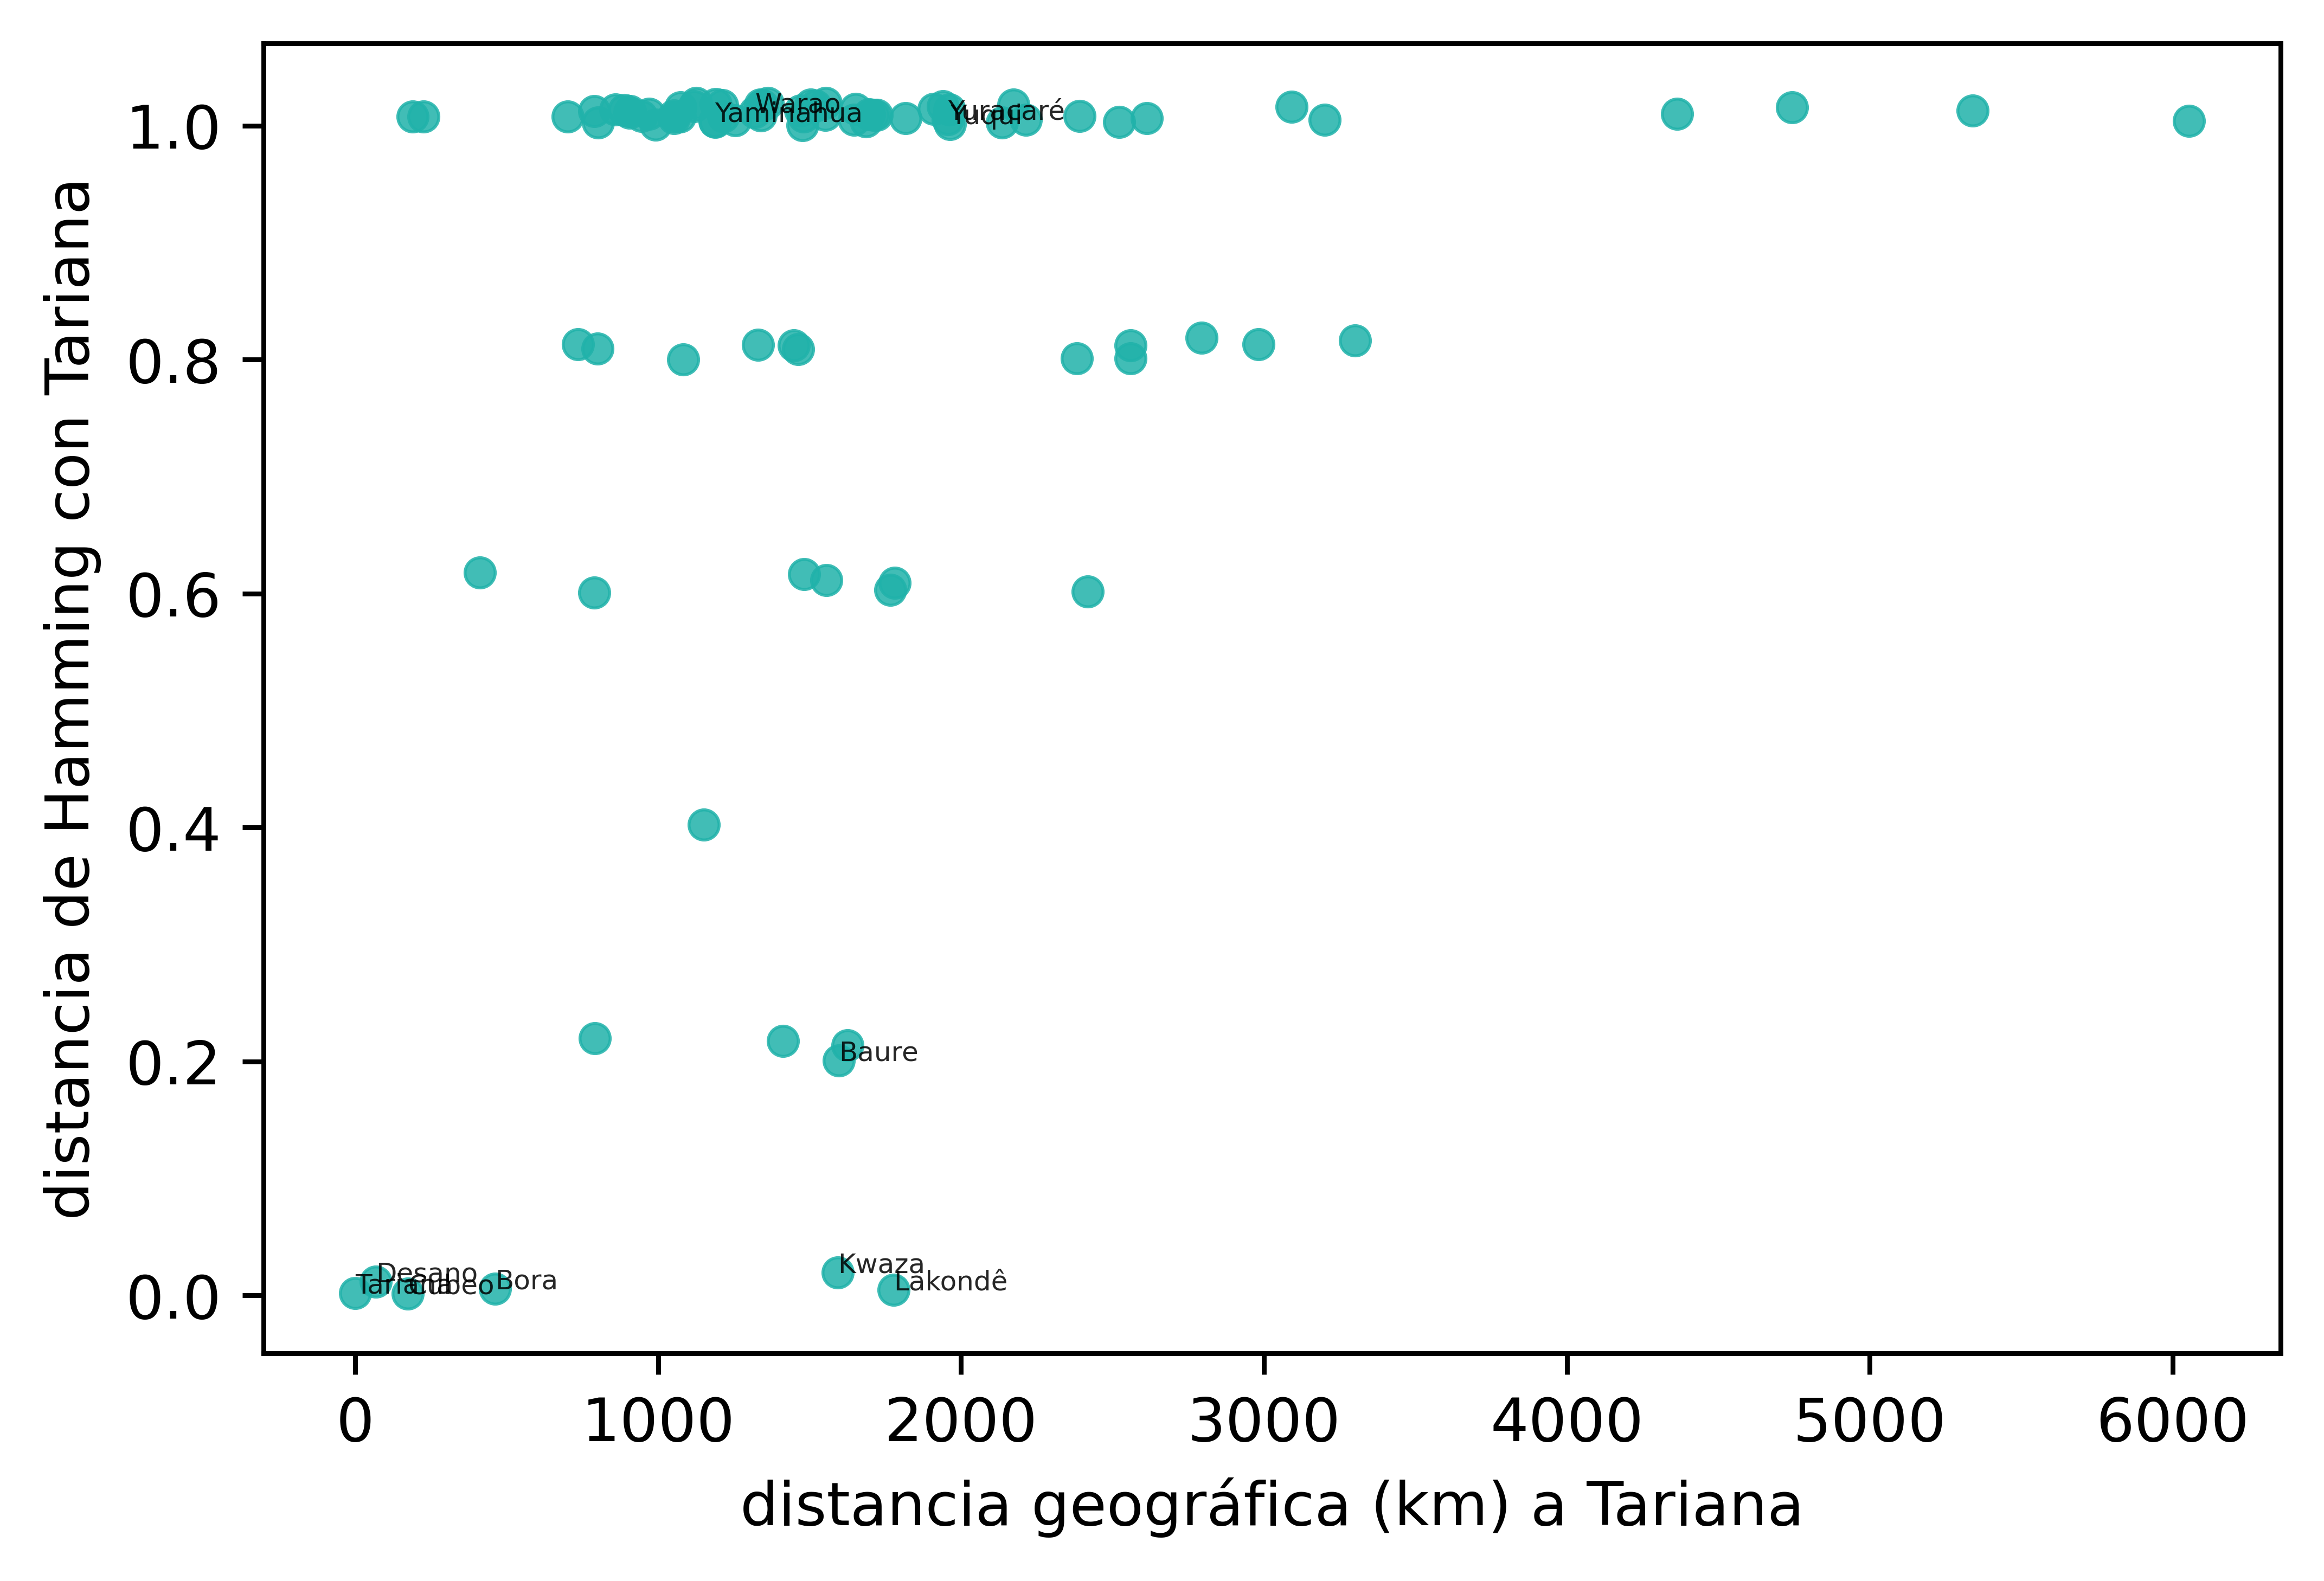

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for lengua in list(distancias_ordenadas.keys())[:7]+list(distancias_ordenadas.keys())[-5:]:
    if lengua in dict_geo_tip.keys():
        i = list(dict_geo_tip.keys()).index(lengua)
        ax.annotate(lengua, color='k', xy=(X[i],Y[i]), fontsize=4.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='lightseagreen',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Hamming con {}'.format(lengua_comp),fontsize=10)
plt.xlabel(r'distancia geográfica (km) a {}'.format(lengua_comp),fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('geo_tip.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## Conclusiones según los gráficos:
En esta tarea, he elegido rasgos de NP-Noun categorization device de SAILS. Me interesan las caracterísitcas de los clasificadores que son una palabra o afijo que acompaña a los nombres y estos  a su vez "clasifican" un nombre según el tipo de referente. Asimismo, estos no se presentan en el inglés ni en otros idiomas europeos, pero sí en lenguas amazónicas, asiáticas y de oceanía. 
- Tomando en cuenta que la lengua tariana pertenece a la familia lingüística Arawak, pero se ubica lejos del territorio de sus lenguas parientes, se puede entender porque la distancia de Hamming señala que los rasgos sobre los clasificadores la asemeja con lenguas que pertenecen a la familia tucano (Cubeo y Desano) y bora. 
- Esto a su vez nos puede llevar a concluir que el rasgo de los clasificadores se concentra en las lenguas amazónicas que coexisten en el río Vaupes, río que discurre entre Colombia y Brasil, tal es el caso de algunas lenguas tucano. También se podría considerar, por otro lado, a las lenguas boras por la gran influencia que tuvieron sobre la familia tucano y arawak. 
